In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
df=pd.read_csv("/content/Amazon Best Sellers.zip")

In [8]:
print(df)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [9]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [11]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [12]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [13]:
df.isnull().sum()

,0
Name,0
Author,0
User Rating,0
Reviews,0
Price,0
Year,0
Genre,0


In [14]:
df.shape

(550, 7)

In [15]:
df.isnull().sum().sum()

0

In [16]:
df = df.dropna()

In [17]:
df['Genre'] = df['Genre'].astype('category').cat.codes
df['Author'] = df['Author'].astype('category').cat.codes

# Convert 'Year' to a categorical variable if needed
df['Year'] = df['Year'].astype('category')

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

NameError: name 'plt' is not defined

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_mode import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

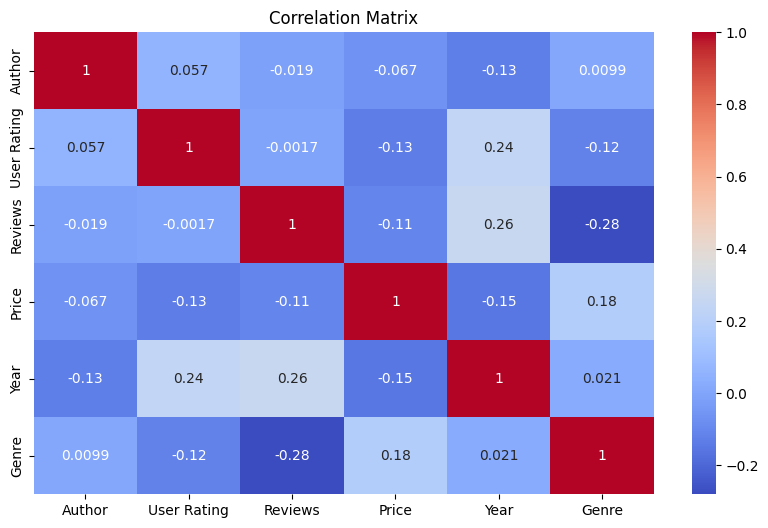

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('Name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

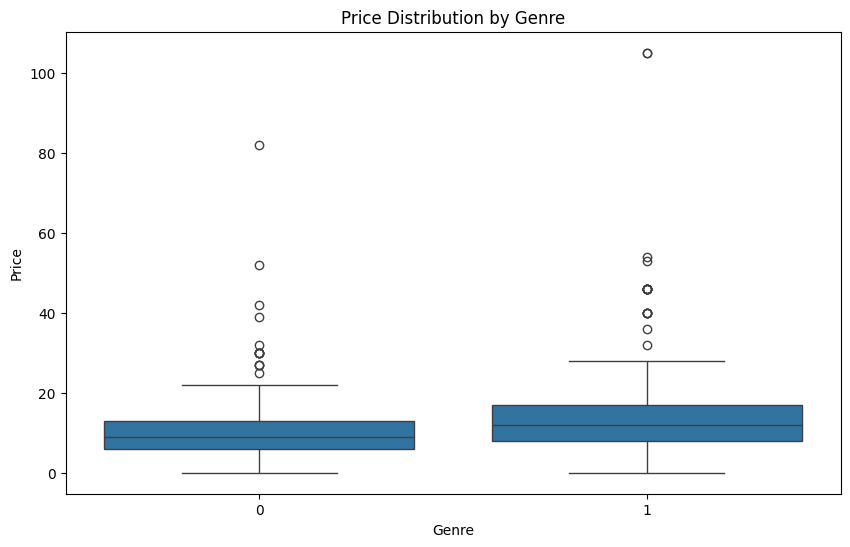

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Genre', y='Price', data=df)
plt.title('Price Distribution by Genre')
plt.show()

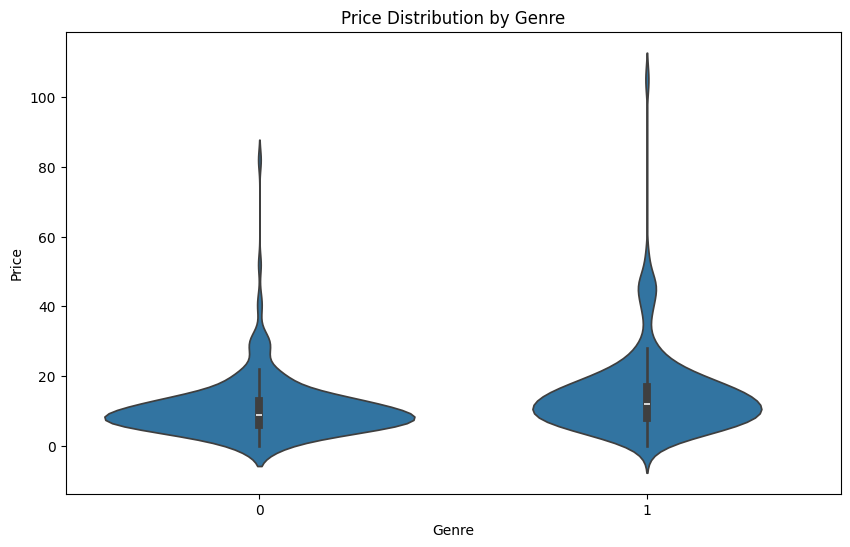

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Genre', y='Price', data=df)
plt.title('Price Distribution by Genre')
plt.show()

(array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 310.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

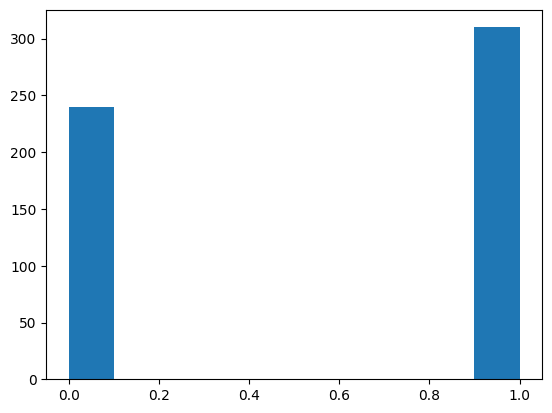

In [25]:
plt.hist(df['Genre'])

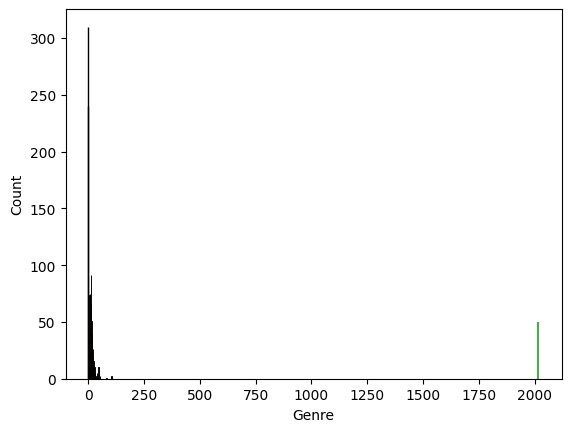

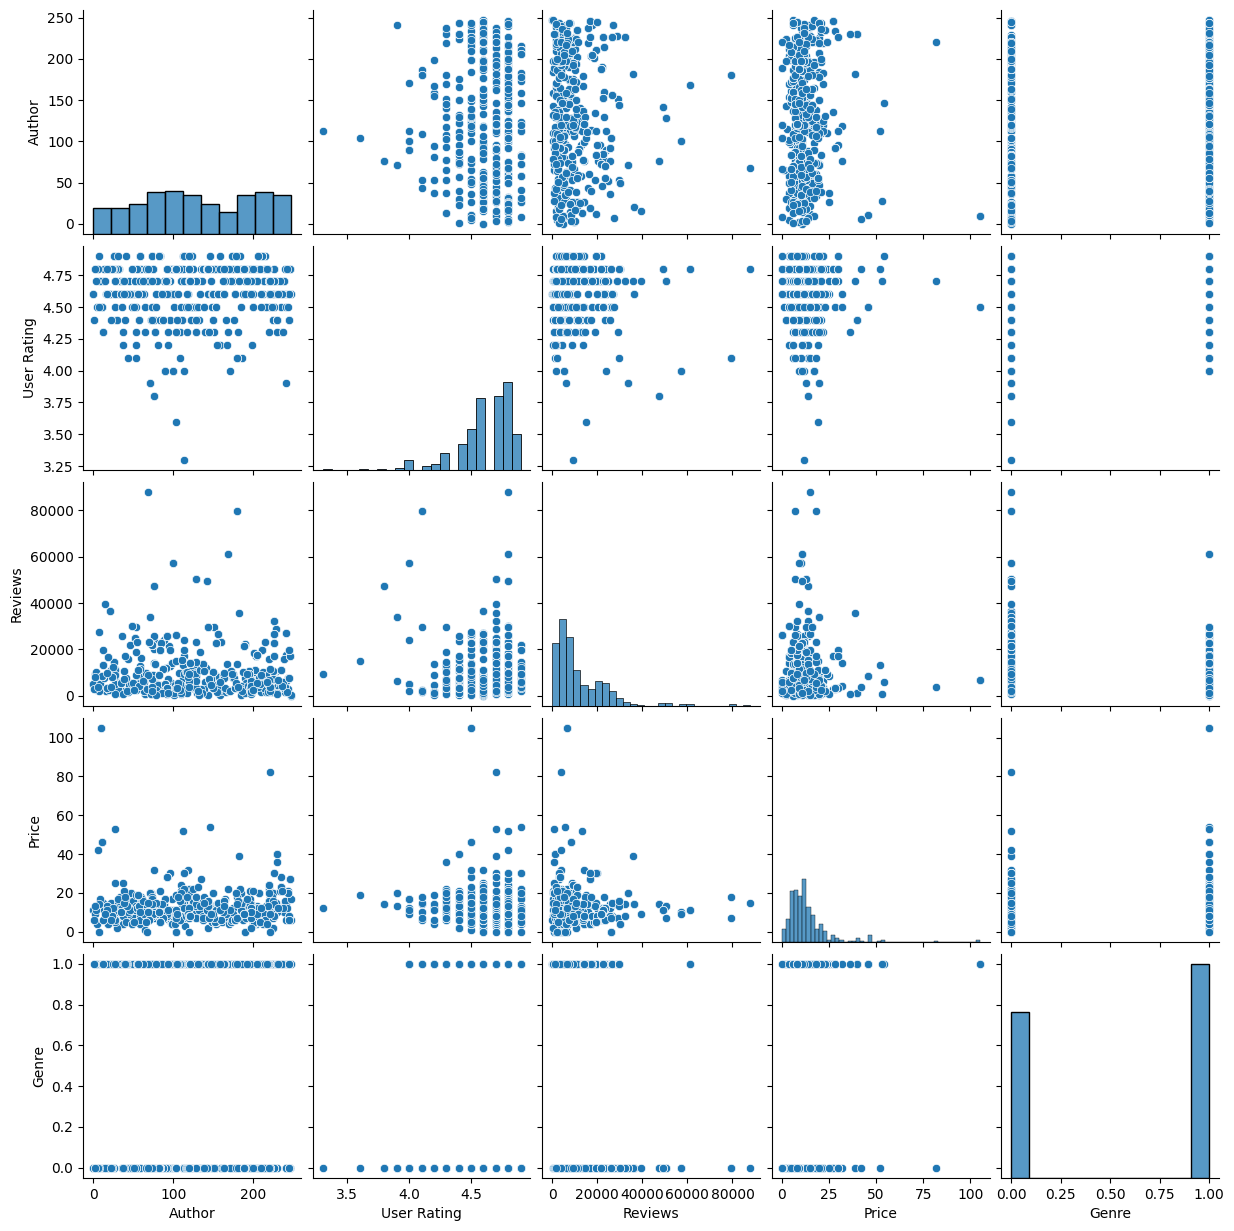

In [26]:
sns.histplot(df['Genre'])
sns.histplot(df['Price'])
sns.histplot(df['Year'])
sns.pairplot(df)

In [27]:
sns.scatterplot(y='Ficton', x='Non Fiction', data=df,hue='Genre')
plt.title('Year vs Price')
plt.legend()

ValueError: Could not interpret value `Non Fiction` for `x`. An entry with this name does not appear in `data`.

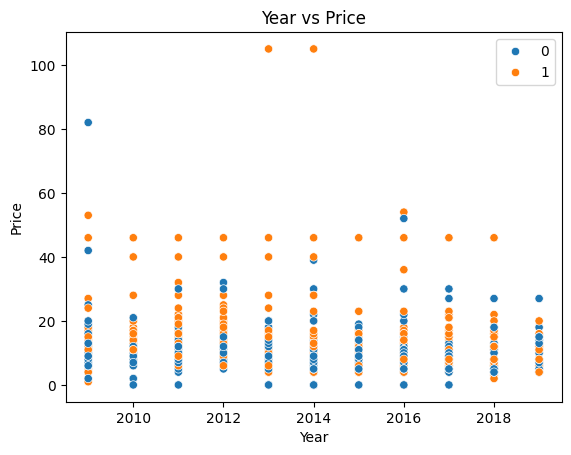

In [29]:
sns.scatterplot(y='Price', x='Year', data=df,hue='Genre')
plt.title('Year vs Price')
plt.legend()

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['User Rating', 'Price', 'Year']])

In [51]:
from sklearn.cluster import KMeans


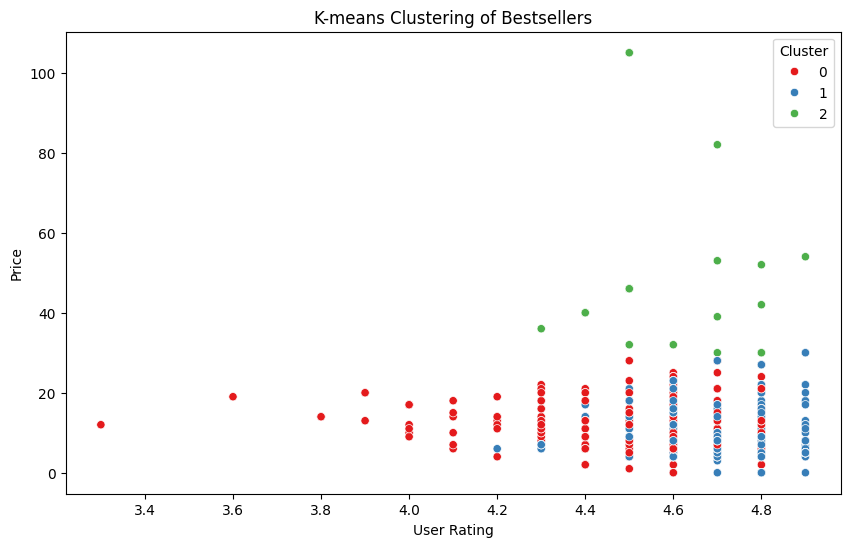

In [55]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['User Rating'], y=df['Price'], hue=df['Cluster'], palette='Set1')
plt.title('K-means Clustering of Bestsellers')
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

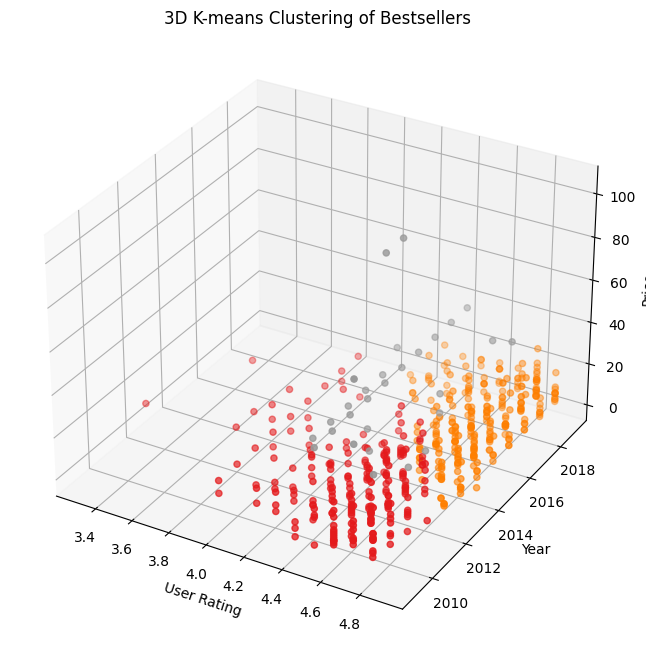

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['User Rating'], df['Year'], df['Price'], c=df['Cluster'], cmap='Set1')
ax.set_xlabel('User Rating')
ax.set_ylabel('Year')
ax.set_zlabel('Price')
ax.set_title('3D K-means Clustering of Bestsellers')
plt.show()

In [31]:
df.drop_duplicates(inplace=True)

In [33]:
!pip install matplotlib seaborn

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

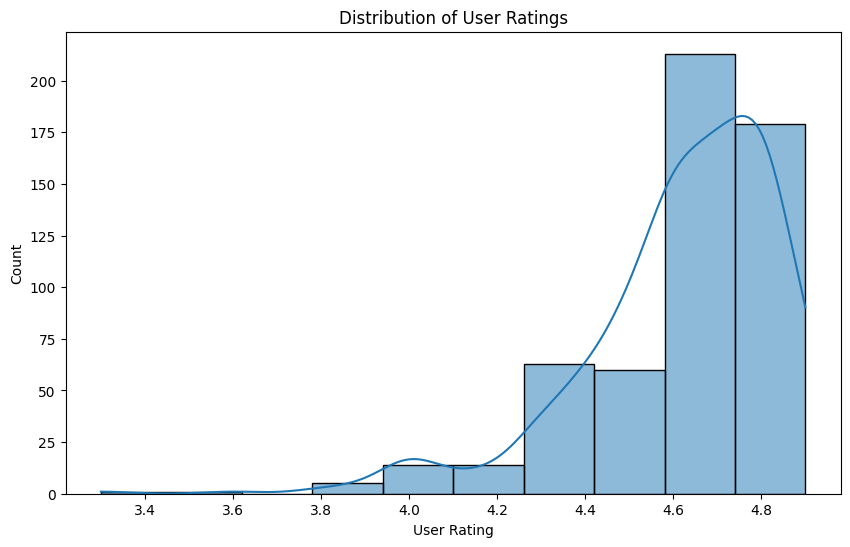

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['User Rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.show()

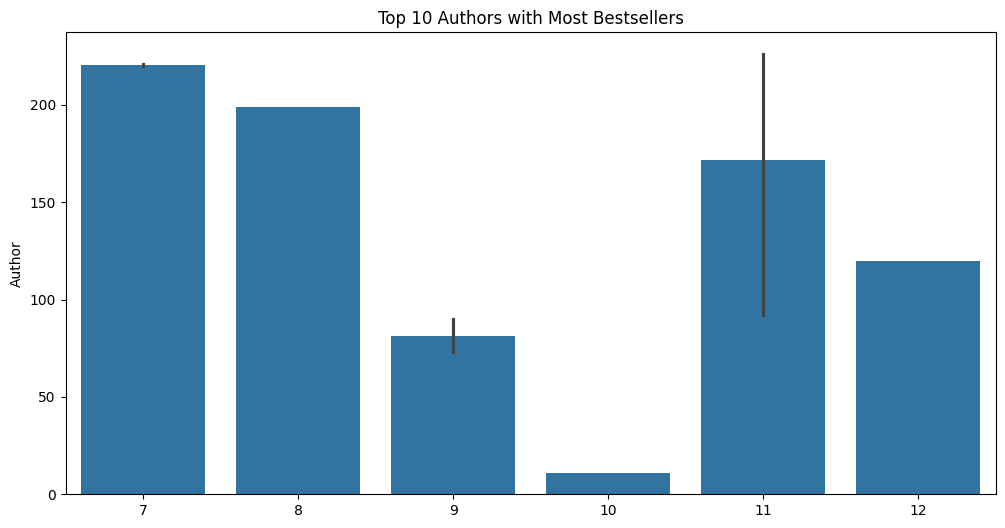

In [36]:
top_authors = df['Author'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors with Most Bestsellers')
plt.show()

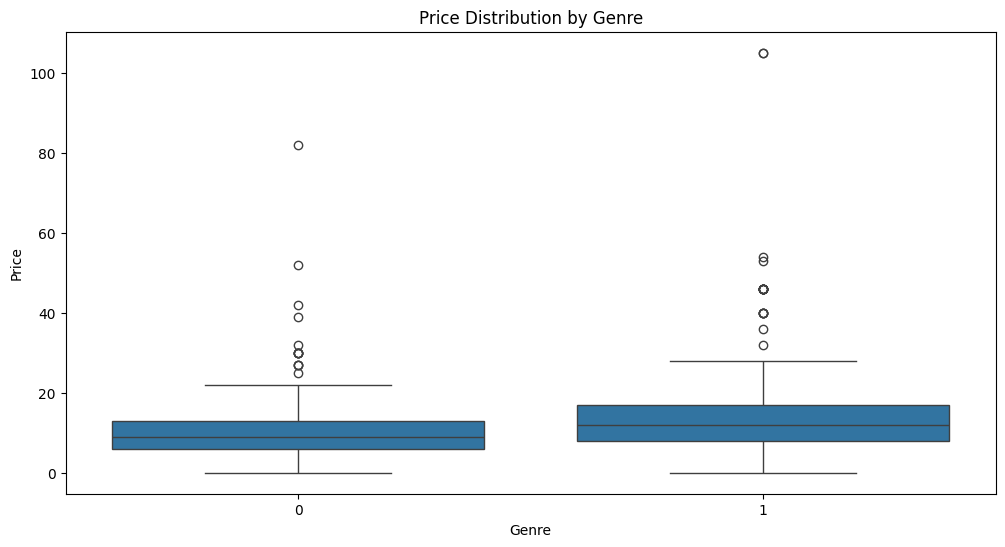

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Price', data=df)
plt.title('Price Distribution by Genre')
plt.show()

<ipython-input-38-e5406ea53862>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_trend = df.groupby('Year').size()


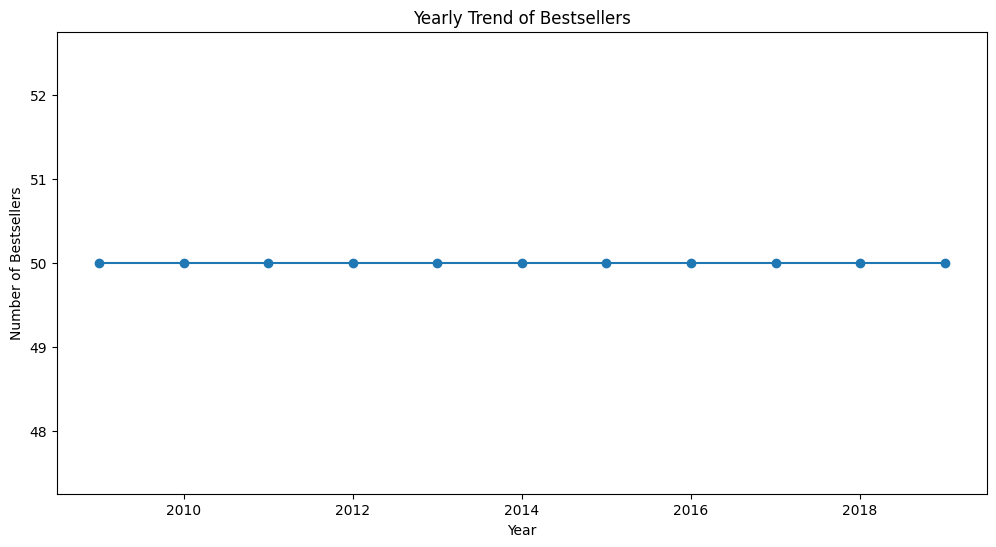

In [38]:
yearly_trend = df.groupby('Year').size()
plt.figure(figsize=(12,6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title('Yearly Trend of Bestsellers')
plt.xlabel('Year')
plt.ylabel('Number of Bestsellers')
plt.show()

In [39]:
df['Genre'] = df['Genre'].map({'Fiction': 0, 'Non Fiction': 1})

In [40]:
from sklearn.model_selection import train_test_split

X = df[['User Rating', 'Year']]  # Independent variables
y = df['Price']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 195.51987670603975
R-squared: 0.022448371976330872


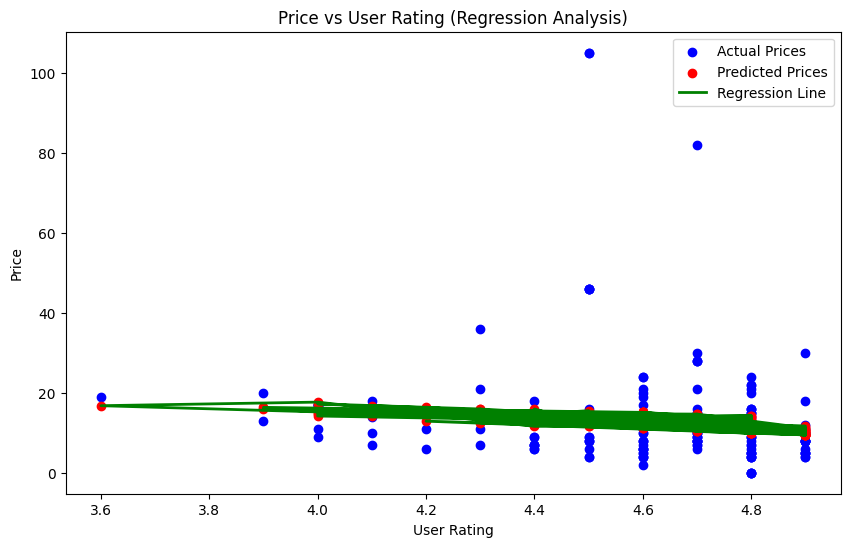

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['User Rating'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['User Rating'], y_pred, color='red', label='Predicted Prices')
plt.plot(X_test['User Rating'], y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.title('Price vs User Rating (Regression Analysis)')
plt.legend()
plt.show()

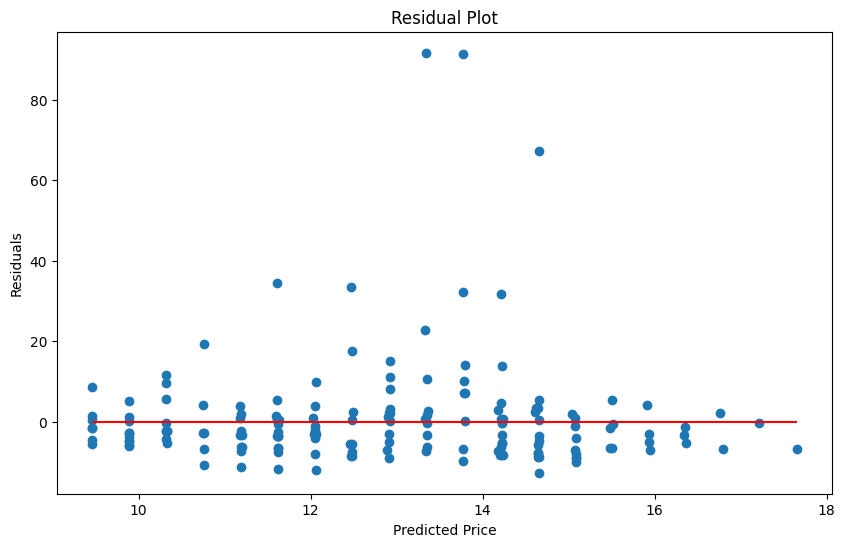

In [45]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='red')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

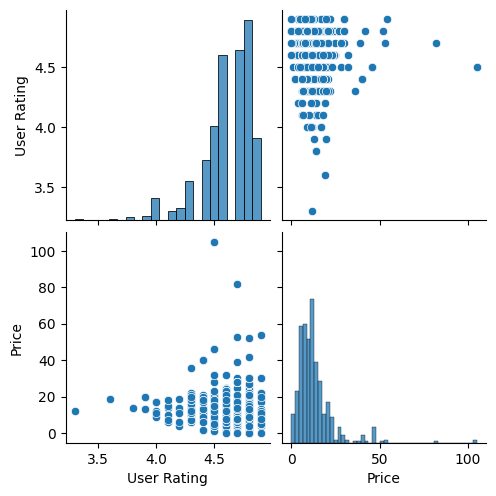

In [46]:
import seaborn as sns

sns.pairplot(df[['User Rating', 'Year', 'Price']])
plt.show()

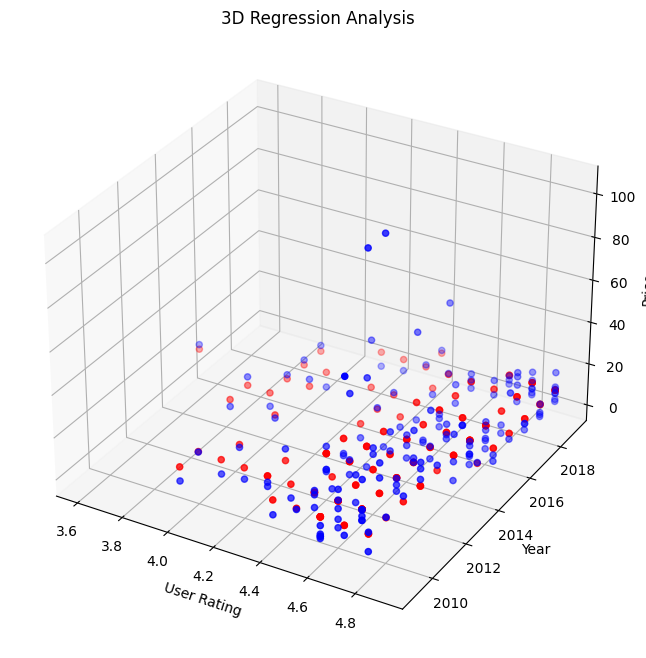

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['User Rating'], X_test['Year'], y_test, color='blue', label='Actual Prices')
ax.scatter(X_test['User Rating'], X_test['Year'], y_pred, color='red', label='Predicted Prices')
ax.set_xlabel('User Rating')
ax.set_ylabel('Year')
ax.set_zlabel('Price')
ax.set_title('3D Regression Analysis')
plt.show()

In [48]:
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 907.7883584377169
Coefficients: [-4.27611715 -0.43456039]


# Report:
 "Analysis of Amazon Bestsellers dataset " by using clustering and regression modules.                 
 --In dataset columns are name,author,user ratings,review,price ,year,and genre.                         
 --by understanding the relationship between user ratings and price ,i have identifiesd patterns through the clustering.            
 --And also i have used regression model to get the price vs user rating by using regression analysis, in that i got the actual prices and prediceted prices along with regression line for this i used scatterplot to get the visualization.                
 -- As well as i have done 3D regression analysis by using user rating and price.


